# Uncomment for Google Colab

# Basic Example

## Initialize the `HDF5Client`

In [1]:
from colabfit.tools.database import MongoDatabase

client = MongoDatabase('basic_example', nprocs=1, drop=True)

## Attaching a property definition

In [2]:
client.insert_property_definition({
    'property-id': 'energy-forces',
    'property-title': 'A default property for storing energies and forces',
    'property-description': 'Energies and forces computed using DFT',
    'energy': {'type': 'float', 'has-unit': True, 'extent': [], 'required': True, 'description': 'Cohesive energy'},
    'forces': {'type': 'float', 'has-unit': True, 'extent': [':',3], 'required': True, 'description': 'Atomic forces'},
})

/home/jvita/scripts/colabfit-tools/colabfit/tools/database.py:625: UserWarning: Invalid KIM property-id; Temporarily renaming to tag:@,0000-00-00:property/energy-forces
  warnings.warn(f"Invalid KIM property-id; Temporarily renaming to {dummy_dict['property-id']}")


In [3]:
client.get_property_definition('energy-forces')['definition']

{'property-id': 'energy-forces',
 'property-title': 'A default property for storing energies and forces',
 'property-description': 'Energies and forces computed using DFT',
 'energy': {'type': 'float',
  'has-unit': True,
  'extent': [],
  'required': True,
  'description': 'Cohesive energy'},
 'forces': {'type': 'float',
  'has-unit': True,
  'extent': [':', 3],
  'required': True,
  'description': 'Atomic forces'}}

## Attaching property settings

In [4]:
from colabfit.tools.property_settings import PropertySettings

pso = PropertySettings(
    method='VASP',
    description='A basic VASP calculation',
    files=None,
    labels=['PBE', 'GGA'],
)

pso_id = client.insert_property_settings(pso)
pso_id

'-8136543487582617353'

## Adding data

### Generating configurations

#### Manually

In [5]:
import numpy as np
from ase import Atoms

images = []
for i in range(1, 1000):
    atoms = Atoms('H'*i, positions=np.random.random((i, 3)))

    atoms.info['_name'] = 'configuration_' + str(i)
    
    atoms.info['dft_energy'] = i*i
    atoms.arrays['dft_forces'] = np.random.normal(size=(i, 3))
    

    images.append(atoms)

#### Using `load_data()`

In [6]:
from ase.io import write

# outfile = '/content/example.extxyz'   # use this line for ColabFit
outfile = '/tmp/example.extxyz'   # use this line for local runs

write(outfile, images)  # use this line for local runs

In [7]:
from colabfit.tools.database import load_data

images = list(load_data(
    file_path=outfile,  # use this line for local runs
    file_format='xyz',
    name_field='_name',
    elements=['H'],
    default_name=None,
    verbose=True
))

Loading data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 7602.33it/s]


### Defining a `property_map`

In [8]:
property_map = {
    # property name
    'energy-forces': {
        # property field: {'field': configuration info/arrays field, 'units': field units}
        'energy': {'field': 'dft_energy', 'units': 'eV'},
        'forces': {'field': 'dft_forces', 'units': 'eV/Ang'},
    }
}

### `insert_data()`

In [9]:
ids = list(client.insert_data(
    images,
    property_map=property_map,
    property_settings={'energy-forces': pso_id},
    generator=False,
    verbose=True
))

/home/jvita/Programs/miniconda2/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
Adding configurations to Database:   0%|                                                                                                        | 0/999 [00:00<?, ?it/s]/home/jvita/scripts/colabfit-tools/colabfit/tools/property.py:231: UserWarning: Invalid KIM property-id; Temporarily renaming to tag:@,0000-00-00:property/energy-forces
  warnings.warn(f"Invalid KIM property-id; Temporarily renaming to {dummy_dict['property-id']}")
Adding configurations to Database: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [00:05<00

Writing configurations: 999
Writing properties: 999
Writing property settings: 1


In [10]:
client.configurations.count_documents({})

999

In [11]:
configurations = list(client.get_configurations('all', verbose=True, generator=True))

Getting configurations: 999it [00:00, 1117.71it/s]


## Defining a `ConfigurationSet`

In [12]:
co_ids = [_['_id'] for _ in client.configurations.find({'nsites': {'$lt': 100}}, {'_id': 1})]

In [13]:
next(client.configurations.find({'_id': co_ids[-1]}))

{'_id': '-328857369669719842',
 'atomic_numbers': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'cell': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
 'chemical_formula_anonymous': 'A',
 'chemical_formula_hill': 'H99',
 'chemical_formula_reduced': 'H',
 'dimension_types': [0, 0, 0],
 'elements': ['H'],
 'elements_ratios': [1.0],
 'labels': [],
 'last_modified': '2021-12-16T09:05:55Z',
 'lattice_vectors': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
 'names': ['configuration_99'],
 'nelements': 1,
 'nperiodic_dimensions': 0,
 'nsi

In [14]:
cs_id = client.insert_configuration_set(co_ids, description='Configurations with fewer than 100 atoms')
cs_id

'-8949898187792458740'

In [15]:
cs = client.get_configuration_set(cs_id)['configuration_set']

In [16]:
cs.description

'Configurations with fewer than 100 atoms'

In [17]:
for k,v in cs.aggregated_info.items():
    print(k, v)

nconfigurations 99
nsites 4950
nelements 1
elements ['H']
individual_elements_ratios [[1.0]]
total_elements_ratios [1.0]
labels []
labels_counts []
chemical_formula_reduced ['H']
chemical_formula_anonymous ['A']
chemical_formula_hill ['H63', 'H99', 'H57', 'H77', 'H31', 'H88', 'H45', 'H33', 'H51', 'H81', 'H48', 'H43', 'H23', 'H3', 'H12', 'H13', 'H96', 'H6', 'H56', 'H4', 'H42', 'H44', 'H79', 'H41', 'H65', 'H70', 'H91', 'H64', 'H14', 'H9', 'H73', 'H75', 'H47', 'H80', 'H69', 'H29', 'H35', 'H71', 'H10', 'H93', 'H58', 'H61', 'H16', 'H82', 'H74', 'H89', 'H67', 'H97', 'H52', 'H11', 'H25', 'H66', 'H95', 'H34', 'H68', 'H36', 'H28', 'H62', 'H55', 'H7', 'H40', 'H2', 'H32', 'H72', 'H46', 'H83', 'H49', 'H17', 'H86', 'H22', 'H87', 'H38', 'H54', 'H5', 'H39', 'H94', 'H21', 'H19', 'H53', 'H27', 'H8', 'H90', 'H15', 'H76', 'H98', 'H30', 'H', 'H78', 'H59', 'H84', 'H50', 'H92', 'H20', 'H24', 'H60', 'H18', 'H37', 'H85', 'H26']
nperiodic_dimensions [0]
dimension_types [[0, 0, 0]]


## Applying labels to configurations

In [18]:
client.apply_configuration_labels({'nsites': {'$lt': 100}}, {'small'}, verbose=True)

Applying configuration labels: 99it [00:00, 1273.06it/s]


Note: need to resync the configuration set document

In [19]:
cs = client.get_configuration_set(cs_id)['configuration_set']
cs.aggregated_info['labels']

[]

In [20]:
cs = client.get_configuration_set(cs_id, resync=True)['configuration_set']
cs.aggregated_info['labels']

['small']

In [21]:
client.apply_configuration_labels({}, {'random_data'}, verbose=True)

Applying configuration labels: 999it [00:00, 1077.22it/s]


In [22]:
cs = client.get_configuration_set(cs_id, resync=True)['configuration_set']
cs.aggregated_info['labels']

['small', 'random_data']

## Creating a `Dataset` from scratch

In [23]:
co_ids1 = [_['_id'] for _ in client.configurations.find({'nsites': {'$lt': 100}})]
co_ids2 = [_['_id'] for _ in client.configurations.find({'nsites': {'$gte': 100}})]

print(len(co_ids1))
print(len(co_ids2))

99
900


In [24]:
cs_id1 = client.insert_configuration_set(co_ids1, 'Small configurations')
cs_id2 = client.insert_configuration_set(co_ids2, 'Big configurations')

In [25]:
pr_ids = [
    _['_id'] for _ in client.properties.find(
        {'relationships.configurations': {'$elemMatch': {'$in': co_ids1+co_ids2}}},
        {'_id': 1}
    )
]
len(pr_ids)

999

In [26]:
ds_id = client.insert_dataset(
    cs_ids=[cs_id1, cs_id2],
    pr_ids=pr_ids,
    authors=['J. E. Lennard-Jones'],
    links=['https://en.wikipedia.org/wiki/John_Lennard-Jones'],
    description="This is an example dataset",
    resync=True
)
ds_id

'1189412695378003550'

In [27]:
dsdoc = next(client.datasets.find({'_id': ds_id}))

for k,v in dsdoc['aggregated_info'].items():
    print(k,v)

nconfigurations 999
nsites 499500
nelements 1
elements ['H']
individual_elements_ratios [[1.0]]
total_elements_ratios [1.0]
configuration_labels ['random_data', 'small']
configuration_labels_counts [999, 99]
chemical_formula_reduced ['H']
chemical_formula_anonymous ['A']
chemical_formula_hill ['H491', 'H818', 'H724', 'H716', 'H191', 'H628', 'H385', 'H290', 'H480', 'H575', 'H691', 'H924', 'H267', 'H503', 'H195', 'H378', 'H57', 'H239', 'H928', 'H995', 'H565', 'H88', 'H218', 'H885', 'H967', 'H735', 'H144', 'H208', 'H247', 'H752', 'H697', 'H663', 'H33', 'H469', 'H547', 'H468', 'H852', 'H518', 'H561', 'H181', 'H560', 'H904', 'H148', 'H415', 'H51', 'H641', 'H487', 'H733', 'H401', 'H151', 'H500', 'H322', 'H894', 'H944', 'H96', 'H498', 'H702', 'H651', 'H168', 'H228', 'H993', 'H912', 'H459', 'H264', 'H139', 'H866', 'H373', 'H413', 'H473', 'H980', 'H740', 'H64', 'H252', 'H422', 'H862', 'H303', 'H209', 'H996', 'H553', 'H512', 'H824', 'H887', 'H505', 'H156', 'H271', 'H223', 'H562', 'H765', 'H823',

In [28]:
dataset = client.get_dataset(ds_id)['dataset']

In [29]:
dataset.aggregated_info

{'nconfigurations': 999,
 'nsites': 499500,
 'nelements': 1,
 'elements': ['H'],
 'individual_elements_ratios': [[1.0]],
 'total_elements_ratios': [1.0],
 'configuration_labels': ['random_data', 'small'],
 'configuration_labels_counts': [999, 99],
 'chemical_formula_reduced': ['H'],
 'chemical_formula_anonymous': ['A'],
 'chemical_formula_hill': ['H491',
  'H818',
  'H724',
  'H716',
  'H191',
  'H628',
  'H385',
  'H290',
  'H480',
  'H575',
  'H691',
  'H924',
  'H267',
  'H503',
  'H195',
  'H378',
  'H57',
  'H239',
  'H928',
  'H995',
  'H565',
  'H88',
  'H218',
  'H885',
  'H967',
  'H735',
  'H144',
  'H208',
  'H247',
  'H752',
  'H697',
  'H663',
  'H33',
  'H469',
  'H547',
  'H468',
  'H852',
  'H518',
  'H561',
  'H181',
  'H560',
  'H904',
  'H148',
  'H415',
  'H51',
  'H641',
  'H487',
  'H733',
  'H401',
  'H151',
  'H500',
  'H322',
  'H894',
  'H944',
  'H96',
  'H498',
  'H702',
  'H651',
  'H168',
  'H228',
  'H993',
  'H912',
  'H459',
  'H264',
  'H139',
  'H866'

## Exploring the data

In [33]:
client.get_statistics('energy-forces.energy')

{'average': 333166.6666666667,
 'std': 297825.4616195346,
 'min': 1.0,
 'max': 998001.0,
 'average_abs': 333166.6666666667}

In [31]:
client.get_statistics('energy-forces.forces')

{'average': -0.00021531450614614613,
 'std': 0.9987363700258607,
 'min': -6.52738132,
 'max': 5.09734544,
 'average_abs': 0.7967814323443305}

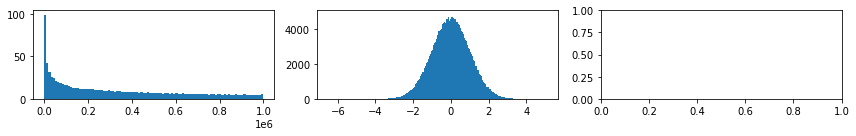

In [32]:
fig = client.plot_histograms(['energy-forces.energy', 'energy-forces.forces'])